<h1>5-Analysis based on the Titles<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import json

In [2]:
df = pd.read_csv("YoutubeData.csv")

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [6]:
df.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region
0,hLqHZGhIFaI,2017-12-23,FIVE LAST MINUTE FAILSAFE CHRISTMAS GIFT IDEAS...,Megan Ellaby,2017-12-14,22,16:10:52,"fashion|""style""|""trends""|""megan ellaby""|""asos_...",23519,683,23,42,https://i.ytimg.com/vi/hLqHZGhIFaI/default.jpg,False,False,False,Christmas is getting close so I thought I'd sh...,People & Blogs,Great Britan
1,7N3ERfi6WHM,2017-12-08,JURASSIC WORLD 2: Fallen Kingdom Trailer (Exte...,FilmSelect Trailer,2017-12-08,24,01:48:02,"trailer|""2018""|""movie""|""filmselect""|""JURASSIC ...",285940,4592,185,731,https://i.ytimg.com/vi/7N3ERfi6WHM/default.jpg,False,False,False,Here is the first official Trailer for Jurassi...,Entertainment,Canada
2,KSkyxpieUI0,2017-12-04,Alistair Overeem vs Francis Ngannou - FULL FIG...,BLACK TIGER,2017-12-03,17,05:06:13,"Alistair Overeem vs Francis Ngannou|""Alistair ...",534912,1250,139,1084,https://i.ytimg.com/vi/KSkyxpieUI0/default.jpg,False,False,False,Alistair Overeem vs Francis Ngannou - UFC 218\...,Sports,Germany
3,Vz1GJUuYzJc,2018-01-14,17 TRUCOS DE MANUALIDADES TAN FÃCILES QUE TE ...,IDEAS EN 5 MINUTOS,2018-01-13,26,12:00:02,"tips|""belleza""|""manualidades""|""bricolaje""|""mad...",46423,1077,62,40,https://i.ytimg.com/vi/Vz1GJUuYzJc/default.jpg,False,False,False,Manualidades creativas y hermosas que puedes h...,Howto & Style,Mexico
4,e1zA-Bk50XI,2018-04-27,Maple Leafs Post-Game: Mike Babcock - April 25...,Toronto Maple Leafs,2018-04-26,17,03:25:21,"Toronto|""Toronto Maple Leafs""|""Leafs""|""Maple L...",37107,263,46,291,https://i.ytimg.com/vi/e1zA-Bk50XI/default.jpg,False,False,False,Head coach Mike Babcock addresses the media fo...,Sports,Canada


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 19 columns):
video_id                  375942 non-null object
trending_date             375942 non-null object
title                     375942 non-null object
channel_title             375942 non-null object
publish_date              375942 non-null object
category_id               375942 non-null int64
publish_time              375942 non-null object
tags                      375942 non-null object
views                     375942 non-null int64
likes                     375942 non-null int64
dislikes                  375942 non-null int64
comment_count             375942 non-null int64
thumbnail_link            375942 non-null object
comments_disabled         375942 non-null bool
ratings_disabled          375942 non-null bool
video_error_or_removed    375942 non-null bool
description               356464 non-null object
category_name             373204 non-null object
region            

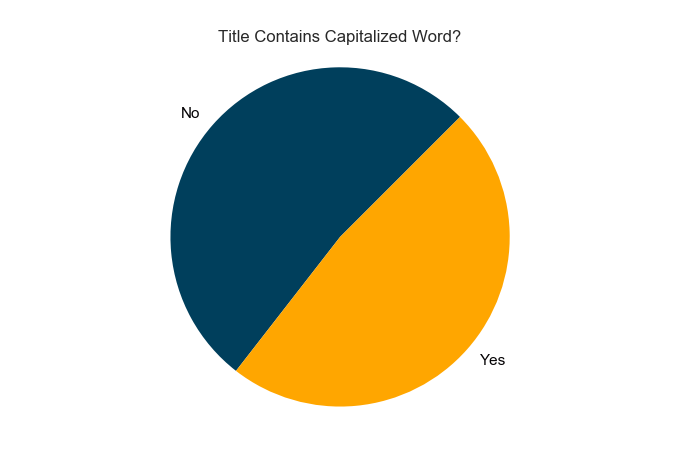

In [8]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [9]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.52
True    0.48
Name: contains_capitalized, dtype: float64

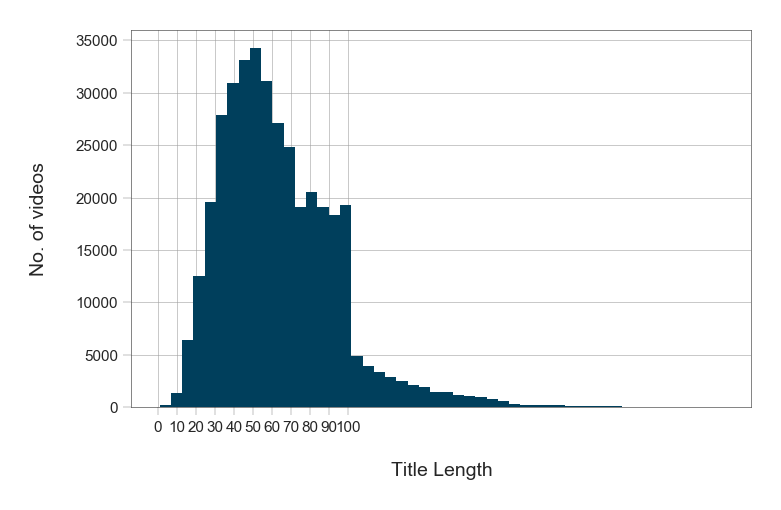

In [10]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

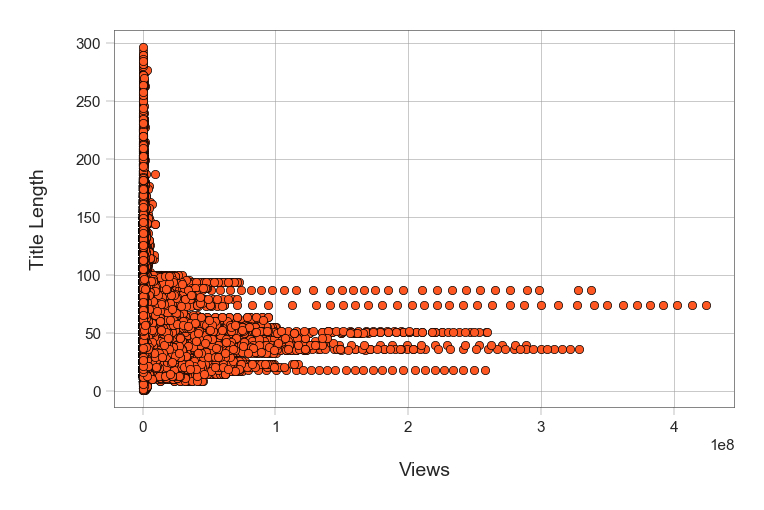

In [11]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

In [13]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(20)

[('-', 114594),
 ('|', 110541),
 ('2018', 27992),
 ('The', 22449),
 ('de', 20671),
 ('&', 15091),
 ('a', 10835),
 ('/', 10805),
 ('the', 10802),
 ('Episode', 10244),
 ('in', 9396),
 ('A', 9178),
 ('of', 8553),
 ('Video)', 8540),
 ('2017', 8327),
 ('2', 8078),
 ('to', 7844),
 ('Trailer', 7552),
 ('(Official', 7543),
 ('\x8bã', 7518)]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data=[]
list=[int()]
title=[int()]

#data splicing
X = data['title'].values.reshape(-1,1)
Y = numpy.log(data['views']).values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape[0])
print(X_test.shape[0])

regressor = LinearRegression()
regressor.fit(X_train, Y_train) #fitting

print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

plt.figure(figsize=(7,6))
plt.scatter(X_train,Y_train, color = 'orange', marker = "+")
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Views Vs Comments Disabled (Training set)')
plt.xlabel('Comments Disabled')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(X_test,Y_test, color = 'skyblue')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Views Vs Comments Disabled (Testing set)')
plt.xlabel('Comments')
plt.ylabel('Views')
plt.show()

TypeError: list indices must be integers or slices, not str

In [ ]:
from statsmodels.formula.api import ols

fit = ols('log_views ~ comments_disabled', data=data).fit() 

fit.summary()
data['log_views'] = numpy.log(data['views'])

In [18]:
channel_category = df['category_name'].value_counts()
channel_category

Entertainment            109006
People & Blogs            54052
Music                     42514
News & Politics           37288
Comedy                    26970
Sports                    23684
Film & Animation          20932
Howto & Style             18856
Gaming                    11498
Science & Technology       8171
Education                  7788
Pets & Animals             4863
Autos & Vehicles           4734
Travel & Events            1776
Shows                       974
Nonprofits & Activism        57
Movies                       36
Trailers                      5
Name: category_name, dtype: int64

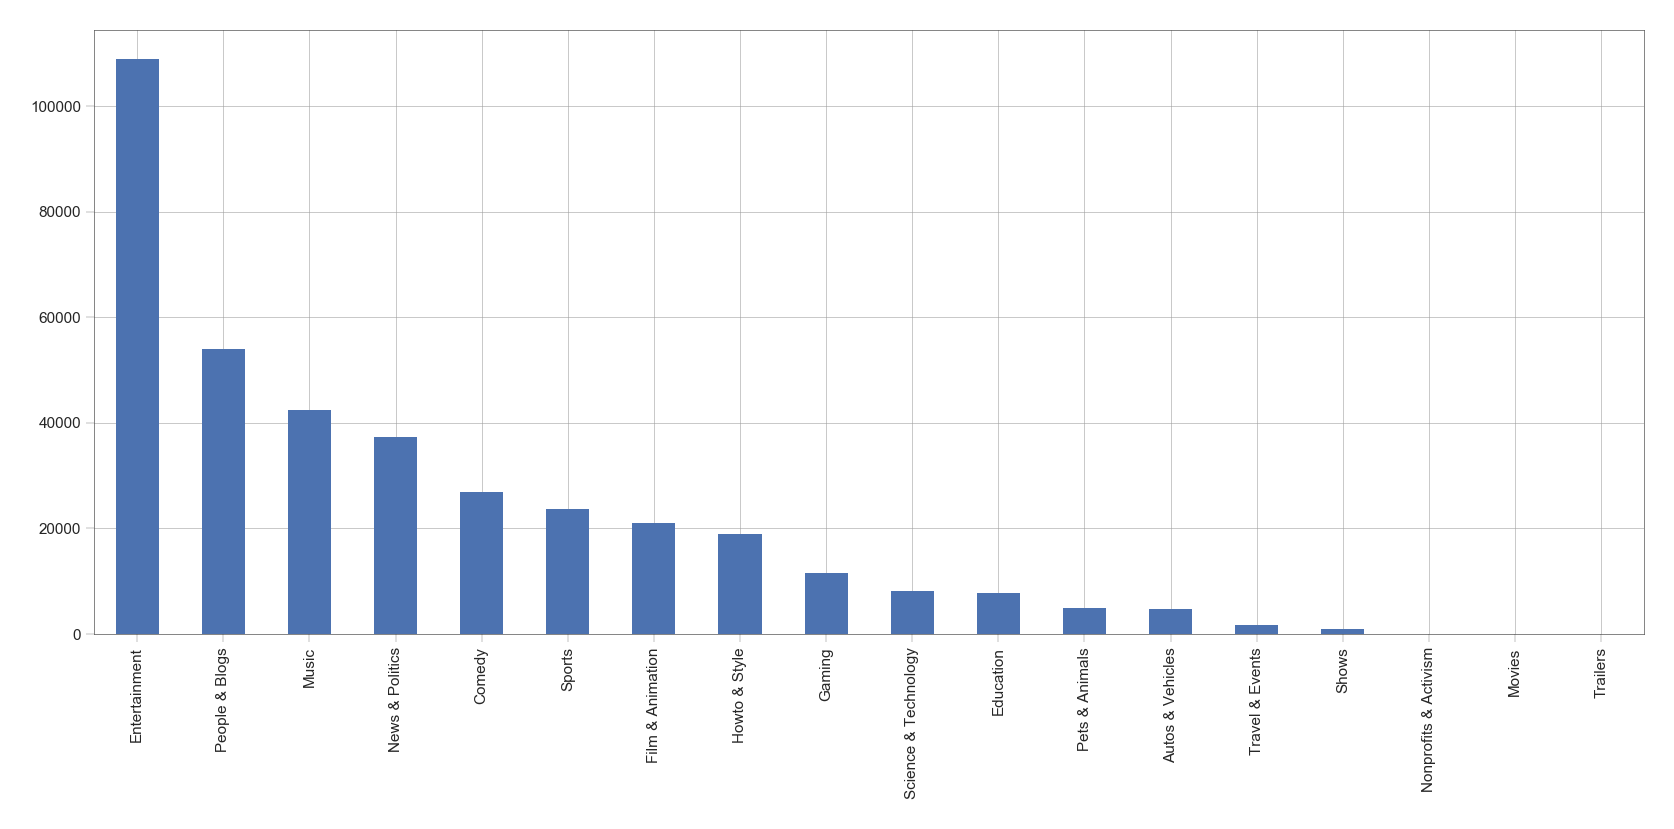

In [19]:
channel_category.plot(kind = 'bar', figsize = (20,8))

In [15]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.13,-0.15,-0.03,-0.07,0.03,0.02,-0.03,-0.00,0.07
views,-0.13,1.00,0.78,0.42,0.51,-0.01,-0.01,0.01,-0.03,-0.08
likes,-0.15,0.78,1.00,0.45,0.79,-0.03,-0.03,0.01,-0.00,-0.13
dislikes,-0.03,0.42,0.45,1.00,0.71,-0.01,-0.01,0.01,-0.01,-0.04
comment_count,-0.07,0.51,0.79,0.71,1.00,-0.03,-0.02,0.00,0.01,-0.09
comments_disabled,0.03,-0.01,-0.03,-0.01,-0.03,1.00,0.29,-0.00,-0.04,0.02
ratings_disabled,0.02,-0.01,-0.03,-0.01,-0.02,0.29,1.00,-0.00,-0.03,0.06
video_error_or_removed,-0.03,0.01,0.01,0.01,0.00,-0.00,-0.00,1.00,-0.01,-0.02
contains_capitalized,-0.00,-0.03,-0.00,-0.01,0.01,-0.04,-0.03,-0.01,1.00,0.08
title_length,0.07,-0.08,-0.13,-0.04,-0.09,0.02,0.06,-0.02,0.08,1.00
